# Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Make the dataset

In [2]:
N = 1000
X = np.random.random((N,2)) * 6 - 3 #uniformly distributed between (-3,+3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

# Plotting the data

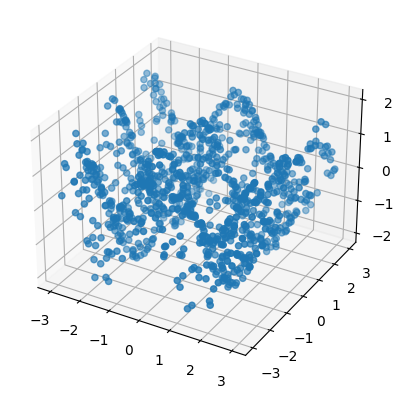

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

# Build the model

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,),activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile and fit

In [5]:
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt,loss = 'mse')
r = model.fit(X,Y, epochs =100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.9939
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9294
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8858
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8940
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8169
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7620
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6992
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6269
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6449
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6101
Epoch 11/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5879
Epoch 12/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5518
Epoch 13/100
32/32 [=================

# Plot the loss

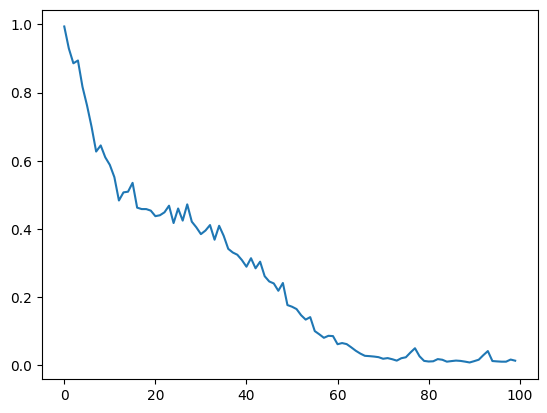

In [6]:
plt.plot(r.history['loss'],label='loss')

# Plot the prediction surface

79/79 [==============================] - 0s 2ms/step


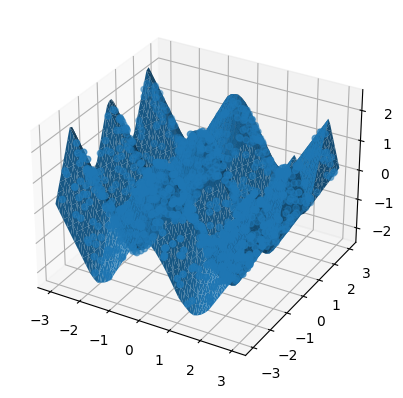

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

# surface plot
line = np.linspace(-3,3,50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(),yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1],Yhat, linewidth=0.2,antialiased = True)
plt.show()